# Minor Project Exam: Exploratory Data Analysis (EDA)

### Problem statement:
Perform exploratory data analysis (EDA) on the given dataset using Python libraries such as Numpy, Pandas, and Matplotlib/Seaborn. The goal is to uncover underlying patterns, relationships, and insights from the data.

##### Additionally, document your process with Python comments explaining your code, and for each section, provide detailed conclusions and observations.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt               # Importing of needed python libraries and functions.
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder

### Section 1: Understanding the Dataset

#### 1.1	Load Data: Import the dataset into your working environment using appropriate methods or libraries.

In [2]:
df=pd.read_csv('car_price_dataset.csv')   # pd.read_csv() - pandas function to read a CSV file and create a DataFrame from it.
df                                                               # Confirm DataFrame and observe data.

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,19537,Hyundai i10,Hyundai,i10,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
15407,19540,Maruti Ertiga,Maruti,Ertiga,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
15408,19541,Skoda Rapid,Skoda,Rapid,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
15409,19542,Mahindra XUV500,Mahindra,XUV500,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000


#### 1.2	Checking Data Shape: Determine the shape of your dataset, including the number of rows and columns.

In [3]:
df.shape    #shape will tell us how many rows and columns is in the dataset, output will give (no. of rows , no. of columns)

(15411, 14)

#### 1.3	View Data: Display the first and last few rows of the dataset and summarize any initial insights.

In [4]:
df.head()   #df.head() will output the first few rows with all columns

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


Conclusion and Observations: The dataset is of the structured type (tabular) and has 15411 rows (entries) with 14 features containing various data types. The display of the first few rows shows us the different column andtheir names to give us an idea of the data set, and the last few rows shows us how many rows there are total (.shape() also shows us number of (row, columns).

### Section 2: Initial Data Examination

In [5]:
df.columns

Index(['Unnamed: 0', 'car_name', 'brand', 'model', 'vehicle_age', 'km_driven',
       'seller_type', 'fuel_type', 'transmission_type', 'mileage', 'engine',
       'max_power', 'seats', 'selling_price'],
      dtype='object')

#### 2.1	Dataset Information: Provide a concise summary of the dataset, including the number of non-null entries, and explain what this reveals.

In [6]:
df.info()    #info() will output all column names, with their relative data types and with the number of non-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         15411 non-null  int64  
 1   car_name           15411 non-null  object 
 2   brand              15411 non-null  object 
 3   model              15411 non-null  object 
 4   vehicle_age        15411 non-null  int64  
 5   km_driven          15411 non-null  int64  
 6   seller_type        15411 non-null  object 
 7   fuel_type          15411 non-null  object 
 8   transmission_type  15411 non-null  object 
 9   mileage            15411 non-null  float64
 10  engine             15411 non-null  int64  
 11  max_power          15411 non-null  float64
 12  seats              15411 non-null  int64  
 13  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 1.6+ MB


In [7]:
for uniques in df.columns:
  print(f'The number of unique values in {uniques} is: {df[uniques].nunique()}')
print('')
print(uniques)           # To check the number of unique values in each column.

The number of unique values in Unnamed: 0 is: 15411
The number of unique values in car_name is: 121
The number of unique values in brand is: 32
The number of unique values in model is: 120
The number of unique values in vehicle_age is: 24
The number of unique values in km_driven is: 3688
The number of unique values in seller_type is: 3
The number of unique values in fuel_type is: 5
The number of unique values in transmission_type is: 2
The number of unique values in mileage is: 411
The number of unique values in engine is: 110
The number of unique values in max_power is: 342
The number of unique values in seats is: 8
The number of unique values in selling_price is: 1086

selling_price


It can be seen that from df.info() that there are totalof 14 columns (1st column is an index column), and each column has zero null/missing values, and there are data types of integer, float (decimal) and object.
Iterated through the columns to find the number of unique values within each column.
Data types and number of unique values determine the feature engineering of data (example for scaling and encoding).

Conclusion and Observations: Theres a total of 15411 rows and 14 columns, containing 3 data types (int64, object and float64), and each column has 15411 non-null values, which means that there is 15411 values in each column which means there is no null (absent) values since there is 15411 rows.

#### 2.2 Inspect Data Types: Check data type of each column in the dataset. If columns need any data type conversion, update the data type accordingly and describe the rationale behind the conversions.

In [8]:
print('Original data types')
print(df.dtypes)                                                            # printing the data types of eaach column.
df['car_name']= df['car_name'].astype('category')                           # permanently changing the data type of column.
df['brand']=df['brand'].astype('category')                                  # permanently changing the data type of column.
df['model']=df['model'].astype('category')                                  # permanently changing the data type of column.
df['seller_type']=df['seller_type'].astype('category')                      # permanently changing the data type of column.
df['fuel_type']=df['fuel_type'].astype('category')                          # permanently changing the data type of column.
df['transmission_type']=df['transmission_type'].astype('category')          # permanently changing the data type of column.
print('')                                                                   # line space
print(df.dtypes)                                                            # printing the new data types of each column.

Original data types
Unnamed: 0             int64
car_name              object
brand                 object
model                 object
vehicle_age            int64
km_driven              int64
seller_type           object
fuel_type             object
transmission_type     object
mileage              float64
engine                 int64
max_power            float64
seats                  int64
selling_price          int64
dtype: object

Unnamed: 0              int64
car_name             category
brand                category
model                category
vehicle_age             int64
km_driven               int64
seller_type          category
fuel_type            category
transmission_type    category
mileage               float64
engine                  int64
max_power             float64
seats                   int64
selling_price           int64
dtype: object


Data types were of integer, float and object.
The integer and float columns are correct and data does correspond to data types.
The data types of object are actually all categorical (nominal) data, and was converted to such, so that they can be encoded in the latter part, also so that it does not negatively impact our analysis.


Rationale behind conversion: The columns, "car_name, brand,model, seller_type, fuel_type and transmission_type are of the object data type and they all have nominal categorical data (non-numeric and no ranking), therefore they should be converted to categorical data types, also for the reason of encoding of the catergorical data

#### 2.3 Summary Statistics: Generate summary statistics for the numerical columns and interpret what these statistics tell you about the data.

In [9]:
df.describe()

,Unnamed: 0,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.000000,15411.000000,1.541100e+04,15411.000000,15411.000000,15411.000000,15411.000000,1.541100e+04
mean,9811.857699,6.036338,5.561648e+04,19.701151,1486.057751,100.588254,5.325482,7.749711e+05
std,5643.418542,3.013291,5.161855e+04,4.171265,521.106696,42.972979,0.807628,8.941284e+05
min,0.000000,0.000000,1.000000e+02,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,4906.500000,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,9872.000000,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.560000e+05
75%,14668.500000,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,19543.000000,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


.describe() returns a statistical summary of each row, including the number of data entries, the mean, standard deviation, min, max values, also the 25%, 50% (median) and 75% percentile of the data.
From this data outliers can be calculated as well as other figures needed.

#### 2.4 Provide detailed comments that explain your understanding of the data.

   
*   So far from initial analysis, the dataset is tabular, with 15411 rows and 14 columns, the first column is an index column.  


*   There were no null/missing values present within columns.


*   There are 4 columns with < 10 uniques values (3, 5, 2, 8) and one with 32, this information is important for future transformation steps.


*   There are integer, floats and object data types, numerical columns correspond to data types, but object columns are categorical and nominal and was therefore changed to category data types for future transformations.

### Section 3: Data Cleaning

#### 3.1 Handling Missing Values: Identify missing values in the dataset and describe how you handled them, including your chosen method.

In [10]:
df.isna().sum()   # isna() outputs all missing values as boolean value, isna() with sum() will output each column with the number of missing values.
                  # it can be seen that there are zero missing or NaN values within dataset.
                  # If there were null/missing values, the they would either be removed permanently using .dropna() function or they wouldbe imputed using the mean/median using fillna()


,0
Unnamed: 0,0
car_name,0
brand,0
model,0
vehicle_age,0
km_driven,0
seller_type,0
fuel_type,0
transmission_type,0
mileage,0


#### 3.2 Handling Duplicates: Check for duplicate rows in the dataset and describe your approach to handling any duplicates found.

In [11]:
df[df.duplicated()]  # There is no duplicated rows, therefore none are to be removed.
                     # If there were duplicated rows, then they could be removed using drop_duplicated() function.

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price


#### 3.3 Outliers removal: Check if there are any outliers and remove them using graphical/non-graphical methods.


**Visual representation of outliers based on box plot**


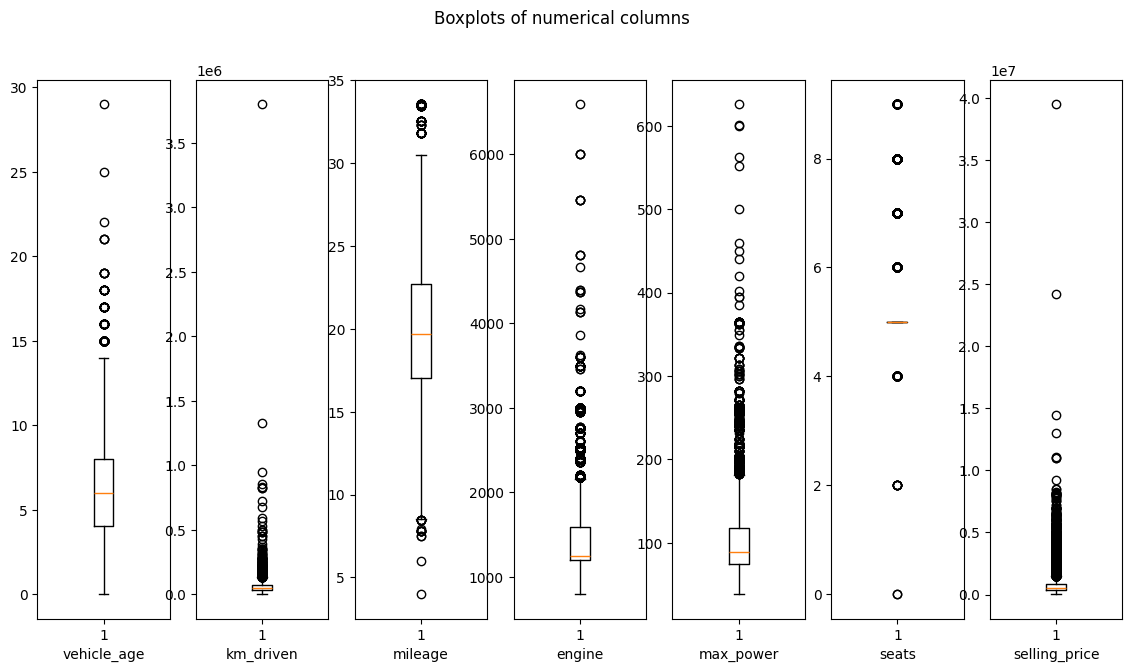

In [12]:
from typing import Literal
fig,ax=plt.subplots(1,7, figsize=(14,7))         # VISUAL REPRESENTATION OF OUTLIERS BASED ON BOX PLOTS

ax[0].boxplot(df['vehicle_age'])
ax[0].set_xlabel('vehicle_age')

ax[1].boxplot(df['km_driven'])
ax[1].set_xlabel('km_driven')

ax[2].boxplot(df['mileage'])
ax[2].set_xlabel('mileage')

ax[3].boxplot(df['engine'])
ax[3].set_xlabel('engine')

ax[4].boxplot(df['max_power'])
ax[4].set_xlabel('max_power')

ax[5].boxplot(df['seats'])
ax[5].set_xlabel('seats')

ax[6].boxplot(df['selling_price'])
ax[6].set_xlabel('selling_price')

plt.tight_layout
fig.suptitle("Boxplots of numerical columns", horizontalalignment='center')
#plt.title('Boxplots of numerical columns',  Literal['center'])
plt.show()


*   **Calcuation of lower and upper limit range of vehicle_age.**

*   **Tabular representation of all rows correspnding to less than the lower limit and greater than the upper limit of veicle_age column (outliers).**



In [13]:
q1_vehicle_age = df['vehicle_age'].quantile(0.25)        # Calcuation of lower and upper limit range of vehicle_age column..

q3_vehicle_age = df['vehicle_age'].quantile(0.75)
IQR = q3_vehicle_age - q1_vehicle_age
LL_vehicle_age = q1_vehicle_age - (1.5*IQR)
UL_vehicle_age = q3_vehicle_age + (1.5*IQR)

print('Lower limit for vehicle age is: ' + str(LL_vehicle_age))
print('Upper limit for vehicle age is: ' + str(UL_vehicle_age))
print('')

index_outliers_vehicle_age = df[(df['vehicle_age']<LL_vehicle_age) | (df['vehicle_age']>UL_vehicle_age)]
index_outliers_vehicle_age      # Tabular representation of all rows correspnding to less than the lower limit and greater than the upper limit of veicle_age column.

Lower limit for vehicle age is: -2.0
Upper limit for vehicle age is: 14.0



,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
65,87,Maruti Wagon R,Maruti,Wagon R,15,37000,Dealer,Petrol,Manual,14.00,1061,64.0,5,155000
161,214,Mahindra Bolero,Mahindra,Bolero,15,120000,Individual,Diesel,Manual,13.60,2523,63.0,7,150000
245,319,Maruti Alto,Maruti,Alto,16,70000,Individual,Petrol,Manual,19.70,796,46.3,5,85000
299,382,Maruti Wagon R,Maruti,Wagon R,15,70000,Individual,Petrol,Manual,18.90,998,67.1,5,200000
344,441,Maruti Alto,Maruti,Alto,16,5000,Individual,Petrol,Manual,19.70,796,46.3,5,95000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15019,19043,Honda Civic,Honda,Civic,15,100000,Individual,Petrol,Manual,13.50,1799,130.0,5,120000
15028,19053,Mahindra Scorpio,Mahindra,Scorpio,15,132087,Individual,Diesel,Manual,10.50,2179,120.0,7,396000
15162,19229,Tata Safari,Tata,Safari,15,70000,Individual,Diesel,Manual,13.93,2956,138.1,7,300000
15316,19423,Maruti Wagon R,Maruti,Wagon R,15,60000,Individual,Petrol,Manual,18.90,998,67.1,5,80000



*   **Calcuation of lower and upper limit range of km_driven.**

*   **Tabular representation of all rows correspnding to less than the lower limit and greater than the upper limit of km_driven column (outliers).**


In [14]:
q1_km_driven = df['km_driven'].quantile(0.25)  # Calcuation of lower and upper limit range of km_driven.
q3_km_driven = df['km_driven'].quantile(0.75)
IQR = q3_km_driven - q1_km_driven
LL_km_driven = q1_km_driven - (1.5*IQR)
UL_km_driven = q3_km_driven + (1.5*IQR)

print('Lower limit for km_driven is: ' + str(LL_km_driven))
print('Upper limit for km_driven is: ' + str(UL_km_driven))
print('')

index_outliers_km_driven = df[(df['km_driven']<LL_km_driven) | (df['km_driven']>UL_km_driven)]
index_outliers_km_driven    # Tabular representation of all rows correspnding to less than the lower limit and greater than the upper limit of km_driven column.

Lower limit for km_driven is: -30000.0
Upper limit for km_driven is: 130000.0



,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
33,39,Mahindra XUV500,Mahindra,XUV500,9,185000,Individual,Diesel,Manual,15.10,2179,140.0,7,600000
72,95,Maruti Swift,Maruti,Swift,10,160000,Individual,Diesel,Manual,17.80,1248,75.0,5,225000
84,107,Hyundai i20,Hyundai,i20,10,160000,Individual,Diesel,Manual,21.90,1396,90.0,5,270000
151,199,Mahindra Bolero,Mahindra,Bolero,13,220000,Individual,Diesel,Manual,13.60,2523,63.0,7,260000
153,201,Mahindra Scorpio,Mahindra,Scorpio,9,170000,Individual,Diesel,Manual,12.05,2179,120.0,8,550000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15296,19395,Renault Duster,Renault,Duster,7,180000,Individual,Diesel,Manual,20.45,1461,83.8,5,500000
15311,19416,Mahindra Bolero,Mahindra,Bolero,8,150000,Individual,Diesel,Manual,13.60,2523,63.0,8,330000
15325,19435,Honda City,Honda,City,7,220000,Dealer,Diesel,Manual,26.00,1498,98.6,5,550000
15339,19452,Toyota Innova,Toyota,Innova,7,140000,Dealer,Diesel,Manual,12.99,2494,100.6,8,1100000



*   **Calcuation of lower and upper limit range of mileage column.**

*   **Tabular representation of all rows correspnding to less than the lower limit and greater than the upper limit of mileage column (outliers).**

In [15]:
q1_mileage = df['mileage'].quantile(0.25)  # Calcuation of lower and upper limit range of mileage column.
q3_mileage = df['mileage'].quantile(0.75)
IQR = q3_mileage - q1_mileage
LL_mileage = q1_mileage - (1.5*IQR)
UL_mileage = q3_mileage + (1.5*IQR)

print('Lower limit for mileage is: ' + str(LL_mileage))
print('Upper limit for mileage is: ' + str(UL_mileage))
print('')

index_outliers_mileage = df[(df['mileage']<LL_mileage) | (df['mileage']>UL_mileage)]
index_outliers_mileage             # Tabular representation of all rows correspnding to less than the lower limit and greater than the upper limit of mileage column.

Lower limit for mileage is: 8.450000000000001
Upper limit for mileage is: 31.25



,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
169,224,Maruti Wagon R,Maruti,Wagon R,3,52000,Dealer,CNG,Manual,33.54,998,67.04,5,435000
182,239,Maruti Wagon R,Maruti,Wagon R,8,64000,Dealer,CNG,Manual,33.54,998,67.04,5,270000
317,404,Maruti Celerio,Maruti,Celerio,3,28000,Dealer,CNG,Manual,31.79,998,58.33,5,455000
480,618,Maruti Alto,Maruti,Alto,5,42000,Dealer,CNG,Manual,33.44,796,40.30,4,260000
693,887,Maruti Wagon R,Maruti,Wagon R,8,67000,Dealer,CNG,Manual,32.52,998,58.33,5,260000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14334,18177,Maruti Alto,Maruti,Alto,3,58000,Dealer,CNG,Manual,33.44,796,40.30,4,350000
14853,18836,Maruti Wagon R,Maruti,Wagon R,3,57000,Dealer,CNG,Manual,32.52,998,58.33,5,435000
14932,18941,Maruti Celerio,Maruti,Celerio,2,50000,Individual,CNG,Manual,31.79,998,58.33,5,390000
15226,19306,Maruti Wagon R,Maruti,Wagon R,5,74844,Dealer,CNG,Manual,33.54,998,67.04,5,390000



*   **Calcuation of lower and upper limit range of engine column.**

*   **Tabular representation of all rows correspnding to less than the lower limit and greater than the upper limit of engine column (outliers).**

In [16]:
q1_engine = df['engine'].quantile(0.25)  # Calcuation of lower and upper limit range of engine column.
q3_engine = df['engine'].quantile(0.75)
IQR = q3_engine - q1_engine
LL_engine = q1_engine - (1.5*IQR)
UL_engine = q3_engine + (1.5*IQR)

print('Lower limit for engine is: ' + str(LL_engine))
print('Upper limit for engine is: ' + str(UL_engine))
print('')

index_outliers_engine = df[(df['engine']<LL_engine) | (df['engine']>UL_engine)]
index_outliers_engine        # Tabular representation of all rows correspnding to less than the lower limit and greater than the upper limit of engine column.

Lower limit for engine is: 619.5
Upper limit for engine is: 2159.5



,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
17,21,Toyota Innova,Toyota,Innova,8,110000,Individual,Diesel,Manual,12.99,2494,100.60,8,605000
24,30,Mahindra Bolero,Mahindra,Bolero,10,25000,Individual,Diesel,Manual,13.60,2523,63.00,7,350000
29,35,Toyota Fortuner,Toyota,Fortuner,8,110000,Individual,Diesel,Manual,13.00,2982,168.50,7,1150000
33,39,Mahindra XUV500,Mahindra,XUV500,9,185000,Individual,Diesel,Manual,15.10,2179,140.00,7,600000
58,80,Mahindra XUV500,Mahindra,XUV500,3,21500,Individual,Diesel,Automatic,15.10,2179,152.87,7,1650000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15379,19507,Toyota Innova,Toyota,Innova,12,74000,Dealer,Diesel,Manual,12.99,2494,100.00,8,595000
15381,19509,Mahindra Thar,Mahindra,Thar,4,43000,Dealer,Diesel,Manual,16.55,2498,105.00,6,795000
15392,19521,Land Rover Rover,Land Rover,Rover,5,128000,Dealer,Diesel,Automatic,12.63,2179,147.50,5,2675000
15397,19527,Toyota Innova,Toyota,Innova,3,21265,Individual,Diesel,Automatic,11.36,2755,171.50,7,2350000



*   **Calcuation of lower and upper limit range of max_power column.**

*   **Tabular representation of all rows correspnding to less than the lower limit and greater than the upper limit of max_power column (outliers).**

In [17]:
q1_max_power = df['max_power'].quantile(0.25)  # Calcuation of lower and upper limit range of max_power column.
q3_max_power = df['max_power'].quantile(0.75)
IQR = q3_max_power - q1_max_power
LL_max_power = q1_max_power - (1.5*IQR)
UL_max_power = q3_max_power + (1.5*IQR)

print('Lower limit for max_power is: ' + str(LL_max_power))
print('Upper limit for max_power is: ' + str(UL_max_power))
print('')

index_outliers_max_power = df[(df['max_power']<LL_max_power) | (df['max_power']>UL_max_power)]
index_outliers_max_power          # Tabular representation of all rows correspnding to less than the lower limit and greater than the upper limit of max_power column.

Lower limit for max_power is: 9.050000000000011
Upper limit for max_power is: 182.25



,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
12,16,Mini Cooper,Mini,Cooper,4,6000,Dealer,Petrol,Automatic,14.41,1998,189.08,5,3250000
77,100,Mercedes-Benz C-Class,Mercedes-Benz,C-Class,9,74352,Dealer,Petrol,Automatic,11.74,1796,186.00,5,775000
111,139,BMW 5,BMW,5,5,63000,Dealer,Diesel,Automatic,18.59,2993,261.49,5,2600000
129,164,Ford Endeavour,Ford,Endeavour,3,11387,Individual,Diesel,Automatic,10.91,3198,197.00,7,2900000
139,178,BMW 3,BMW,3,5,68000,Dealer,Diesel,Automatic,22.69,1995,190.00,5,2090000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15298,19397,BMW 5,BMW,5,7,43000,Dealer,Diesel,Automatic,18.12,1995,190.00,5,2325000
15306,19407,BMW X1,BMW,X1,3,39000,Dealer,Diesel,Automatic,20.68,1995,188.00,5,2900000
15320,19428,Audi A6,Audi,A6,5,27000,Dealer,Petrol,Automatic,15.26,1798,187.74,5,3000000
15333,19443,Land Rover Rover,Land Rover,Rover,5,114000,Dealer,Diesel,Automatic,12.51,2179,187.70,7,2900000



*   **Calcuation of lower and upper limit range of seats column.**

*   **Tabular representation of all rows correspnding to less than the lower limit and greater than the upper limit of seats column (outliers).**

In [18]:
q1_seats = df['seats'].quantile(0.25)  # Calcuation of lower and upper limit range of seats column.
q3_seats = df['seats'].quantile(0.75)
IQR = q3_seats - q1_seats
LL_seats = q1_seats - (1.5*IQR)
UL_seats = q3_seats + (1.5*IQR)

print('Lower limit for seats is: ' + str(LL_seats))
print('Upper limit for seats is: ' + str(UL_seats))
print('')

index_outliers_seats = df[(df['seats']<LL_seats) | (df['seats']>UL_seats)]
index_outliers_seats        # Tabular representation of all rows correspnding to less than the lower limit and greater than the upper limit of seats column.

Lower limit for seats is: 5.0
Upper limit for seats is: 5.0



,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
17,21,Toyota Innova,Toyota,Innova,8,110000,Individual,Diesel,Manual,12.99,2494,100.60,8,605000
24,30,Mahindra Bolero,Mahindra,Bolero,10,25000,Individual,Diesel,Manual,13.60,2523,63.00,7,350000
29,35,Toyota Fortuner,Toyota,Fortuner,8,110000,Individual,Diesel,Manual,13.00,2982,168.50,7,1150000
33,39,Mahindra XUV500,Mahindra,XUV500,9,185000,Individual,Diesel,Manual,15.10,2179,140.00,7,600000
40,54,Mahindra Bolero,Mahindra,Bolero,1,40000,Individual,Diesel,Manual,21.00,1498,74.96,7,850000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15381,19509,Mahindra Thar,Mahindra,Thar,4,43000,Dealer,Diesel,Manual,16.55,2498,105.00,6,795000
15397,19527,Toyota Innova,Toyota,Innova,3,21265,Individual,Diesel,Automatic,11.36,2755,171.50,7,2350000
15404,19535,Maruti Ertiga,Maruti,Ertiga,5,56829,Dealer,Diesel,Manual,20.77,1248,88.80,7,895000
15407,19540,Maruti Ertiga,Maruti,Ertiga,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000



*   **Calcuation of lower and upper limit range of selling_price column.**

*   **Tabular representation of all rows correspnding to less than the lower limit and greater than the upper limit of selling_price column (outliers).**

In [19]:
q1_selling_price = df['selling_price'].quantile(0.25)  # Calcuation of lower and upper limit range of selling_price column.
q3_selling_price = df['selling_price'].quantile(0.75)
IQR = q3_selling_price - q1_selling_price
LL_selling_price = q1_selling_price - (1.5*IQR)
UL_selling_price = q3_selling_price + (1.5*IQR)

print('Lower limit for selling_price is: ' + str(LL_selling_price))
print('Upper limit for selling_price is: ' + str(UL_selling_price))
print('')

index_outliers_selling_price = df[(df['selling_price']<LL_selling_price) | (df['selling_price']>UL_selling_price)]
index_outliers_selling_price        # Tabular representation of all rows correspnding to less than the lower limit and greater than the upper limit of selling_price column.

Lower limit for selling_price is: -275000.0
Upper limit for selling_price is: 1485000.0



,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
12,16,Mini Cooper,Mini,Cooper,4,6000,Dealer,Petrol,Automatic,14.41,1998,189.08,5,3250000
58,80,Mahindra XUV500,Mahindra,XUV500,3,21500,Individual,Diesel,Automatic,15.10,2179,152.87,7,1650000
111,139,BMW 5,BMW,5,5,63000,Dealer,Diesel,Automatic,18.59,2993,261.49,5,2600000
129,164,Ford Endeavour,Ford,Endeavour,3,11387,Individual,Diesel,Automatic,10.91,3198,197.00,7,2900000
139,178,BMW 3,BMW,3,5,68000,Dealer,Diesel,Automatic,22.69,1995,190.00,5,2090000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15360,19481,Jeep Compass,Jeep,Compass,3,70000,Individual,Diesel,Manual,16.30,1956,170.00,5,1750000
15362,19484,BMW 5,BMW,5,4,30000,Dealer,Diesel,Automatic,22.48,1995,187.74,5,3975000
15384,19513,Mercedes-Benz E-Class,Mercedes-Benz,E-Class,3,25000,Dealer,Diesel,Automatic,10.00,2148,170.00,5,4450000
15392,19521,Land Rover Rover,Land Rover,Rover,5,128000,Dealer,Diesel,Automatic,12.63,2179,147.50,5,2675000


#### 3.4 Add python comments to explain the observations.

In [20]:
# As seen from df.isna(.sum() - the output showed that their are no missing or NaN values as each coloumn has zero missing or NaN values within the dataset.
# As seend from df.duplicated() - the output showed that there are zero duplicated rowswithin the dataset

# The outliers of each 7 numeric columns shall not be removed or imputated since each column will effect the selling price because they are
# apart of the data and most likely not mistakes or incorrectly entered data, for example,
# The vehicle age outliers cannot be removed because it could be the case that a vehicle could be very old
# (vintage or even just in high demand within groups of people), and therefore have a greater selling price.

# The km_driven outliers cannot be removed because it could be the case that a vehicle could have a large km_driven or
# vintage or even just in high demand within groups of people), and therefore have a greater selling price, or could have a high km_driven and have
# a low selling price due to wear and tear on the vehicle.

# The mileage outliers cannot be removed because it could be the case that a vehicle could have a high mileage (better fuel consumption)
# but that depends on the fuel type, because from data set its seen that vehicles of fuel_type CNG has a much better fuel consumption than
# other fuel_types, and therefore could mean that selling price is higher for that or maybe the technology is cheaper cost and could be lower
# selling price for better fuel consumption.

# The engine (size) outliers cannot be removed because it could be the case that a vehicle could have a larger engine size and
# therefore a higher selling price (example- V8 and v12 engines will cost much more than a normal 2L engine).
# can also be seen visually that there are a great number of outliers for engine and selling_price abov the upper limit

# The max_power outliers cannot be removed because it could be the case that a vehicle could have a vehicle with a larger amount
# of power and therefore a higher selling price, since generally faster cars cost more due to larger engine size or technologies that make it faster
# from a smaller engine.
# can also be seen visually that there are a great number of outliers for max_power and selling_price above the upper limit

# The seats outliers cannot be removed because it could be the case that a vehicle could vary in size and therefore can have seats lower or above the
# lower and upper limits, it can be seen visually that most outliers would correspond to a motorbike, van with 2 seats (2x2), and 6 seats is an
# outlier whihc would correspond to a huge amount of vehicles (specifically SUV's, 4x4's).

# Outliers, when need to be removed, can be removed by condition with the UL and LL, or they can be imputed with the mean/median value,
# or value < LL will be filled with LL value, and values > UL will be filled with UL values.



### Section 4: Data Analysis

#### 4.1 Univariate Analysis of numeric features: Generate histograms for numerical data and infer insights from these visualizations.

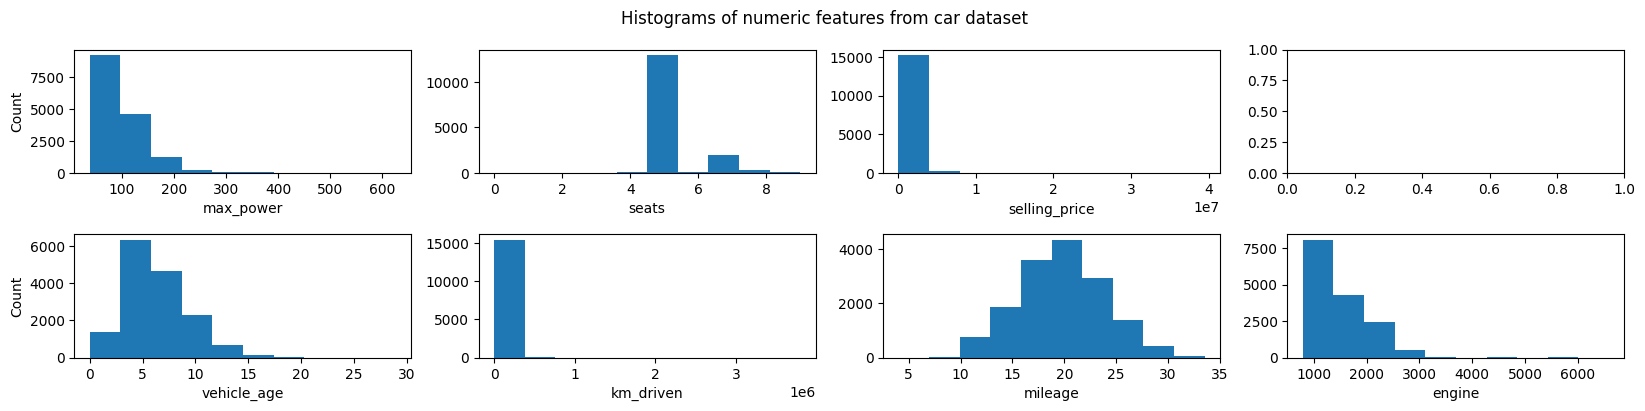

In [21]:
fig,ax=plt.subplots(2,4, figsize=(20,4))         # VISUAL REPRESENTATION OF OUTLIERS BASED ON BOX PLOTS

ax[1][0].hist(df['vehicle_age'])
ax[1][0].set_xlabel('vehicle_age')
ax[1][0].set_ylabel('Count')

ax[1][1].hist(df['km_driven'])
ax[1][1].set_xlabel('km_driven')

ax[1][2].hist(df['mileage'])
ax[1][2].set_xlabel('mileage')

ax[1][3].hist(df['engine'])
ax[1][3].set_xlabel('engine')

ax[0][0].hist(df['max_power'])
ax[0][0].set_xlabel('max_power')
ax[0][0].set_ylabel('Count')

ax[0][1].hist(df['seats'])
ax[0][1].set_xlabel('seats')

ax[0][2].hist(df['selling_price'])
ax[0][2].set_xlabel('selling_price')

#ax[0][3].hist(df['brand'])
#ax[0,3].set_xlabel('brands')            # Not going to include histogram of brands because there are to many unique values
#plt.sca(ax[0, 3])                       # Better to represent it with a horizontal bar chart.
#plt.xticks(rotation=45)

plt.tight_layout
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Histograms of numeric features from car dataset')
plt.show()

4.1) Since histograms is good for representing continuous numerical data, the features containing numeric data was chosen,, and its seen that mileage is the only feature with a symetric distribution, with max_power, vehicle_age, km_driven, selling_price and engine having positively skewed data, meaning that there mode and median value is less than their mean value.

#### 4.2 Examine the skewness in the data and apply appropriate data transformation technique.  

In [22]:
df2 = df.copy()     # Creating an independent copy of dafatframe (df). Going to use df for transformation.

In [23]:
df.skew(numeric_only=True)   # Investigating initial skewness of data set.

,0
Unnamed: 0,-0.014554
vehicle_age,0.833712
km_driven,28.172711
mileage,0.104961
engine,1.666467
max_power,2.485129
seats,2.039983
selling_price,10.047048


In [24]:
vehicle_age_log = np.log(df['vehicle_age'] + 1)              # Performing log functions on all numeric data, except for mileage, since its distribution is close to 0 (0.1)
df['vehicle_age'] = vehicle_age_log

km_driven_log = np.log(df['km_driven'] + 1)
df['km_driven'] = km_driven_log

engine_log = np.log(df['engine'] + 1)
df['engine'] = engine_log

max_power_log = np.log(df['max_power'] + 1)
df['max_power'] = max_power_log

seats_log = np.log(df['seats'] + 1)
df['seats'] = seats_log

selling_price_log = np.log(df['selling_price'] + 1)
df['selling_price'] = selling_price_log

df.skew(numeric_only=True)                    # Rechecking data distribution after log function was apllied.

,0
Unnamed: 0,-0.014554
vehicle_age,-0.218956
km_driven,-1.036292
mileage,0.104961
engine,0.699124
max_power,0.771409
seats,1.245620
selling_price,0.568413


In [25]:
#km_driven_cbrt = np.cbrt(df['km_driven'] + 1)                # Performing cube root function on all numeric columns except for
#df['km_driven'] = km_driven_cbrt
                                                              # vehicle_age and km_driven, since the cube root function caused them to have a worse distribution
engine_cbrt = np.cbrt(df['engine'] + 1)
df['engine'] = engine_cbrt

max_power_cbrt = np.cbrt(df['max_power'] + 1)
df['max_power'] = max_power_cbrt

seats_cbrt = np.cbrt(df['seats'] + 1)
df['seats'] = seats_cbrt

selling_price_cbrt = np.cbrt(df['selling_price'] + 1)
df['selling_price'] = selling_price_cbrt

df.skew(numeric_only=True)            # Rechecking data distribution after lcube root function was apllied.

,0
Unnamed: 0,-0.014554
vehicle_age,-0.218956
km_driven,-1.036292
mileage,0.104961
engine,0.631413
max_power,0.629017
seats,0.276358
selling_price,0.419874


#### 4.3 Apply appropriate standardization method wherever applicable.

In [26]:
df.dtypes

,0
Unnamed: 0,int64
car_name,category
brand,category
model,category
vehicle_age,float64
km_driven,float64
seller_type,category
fuel_type,category
transmission_type,category
mileage,float64


In [27]:
scaler= MinMaxScaler()
column_list= ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']
x=df[column_list]
x_scaled= scaler.fit_transform(x)
x_scaled_df= pd.DataFrame(x_scaled, columns=column_list)

In [28]:
x_scaled_df   # Scaled values of numeric columns only show with this variable because it is not changedin data frame as yet

,vehicle_age,km_driven,mileage,engine,max_power,seats
0,0.676992,0.672033,0.531483,0.001936,0.076740,0.834179
1,0.526803,0.501967,0.504401,0.207556,0.301432,0.834179
2,0.730598,0.606242,0.440081,0.207556,0.292017,0.834179
3,0.676992,0.560357,0.572783,0.116782,0.224225,0.834179
4,0.572125,0.540451,0.635410,0.317709,0.370890,0.834179
...,...,...,...,...,...,...
15406,0.676992,0.442805,0.535206,0.159139,0.229694,0.834179
15407,0.323008,0.491967,0.457007,0.275157,0.341274,0.929834
15408,0.572125,0.616716,0.580230,0.317709,0.389054,0.834179
15409,0.526803,1.000000,0.406229,0.497429,0.499353,0.929834


In [29]:
df   # numeric columns have not been changed to scaled values permanently as yet.

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,2.302585,11.695255,Individual,Petrol,Manual,19.70,1.973043,1.693459,1.408076,2.332816
1,1,Hyundai Grand,Hyundai,Grand,1.791759,9.903538,Individual,Petrol,Manual,18.90,2.007340,1.756449,1.408076,2.422569
2,2,Hyundai i20,Hyundai,i20,2.484907,11.002117,Individual,Petrol,Manual,17.00,2.007340,1.753809,1.408076,2.368001
3,3,Maruti Alto,Maruti,Alto,2.302585,10.518700,Individual,Petrol,Manual,20.92,1.992199,1.734805,1.408076,2.370963
4,4,Ford Ecosport,Ford,Ecosport,1.945910,10.308986,Dealer,Diesel,Manual,22.77,2.025714,1.775920,1.408076,2.424596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,19537,Hyundai i10,Hyundai,i10,2.302585,9.280239,Dealer,Petrol,Manual,19.81,1.999264,1.736338,1.408076,2.376933
15407,19540,Maruti Ertiga,Maruti,Ertiga,1.098612,9.798183,Dealer,Petrol,Manual,17.50,2.018616,1.767618,1.454869,2.451744
15408,19541,Skoda Rapid,Skoda,Rapid,1.945910,11.112463,Dealer,Diesel,Manual,21.14,2.025714,1.781012,1.408076,2.407836
15409,19542,Mahindra XUV500,Mahindra,XUV500,1.791759,15.150512,Dealer,Diesel,Manual,16.00,2.055692,1.811933,1.454869,2.467223


In [30]:
for col in column_list:
  df[col] = x_scaled_df[col]    # To replace columns with scaled columns.

In [31]:
df   # To confirm scaled numeric values have changed permanently on data frame

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,0.676992,0.672033,Individual,Petrol,Manual,0.531483,0.001936,0.076740,0.834179,2.332816
1,1,Hyundai Grand,Hyundai,Grand,0.526803,0.501967,Individual,Petrol,Manual,0.504401,0.207556,0.301432,0.834179,2.422569
2,2,Hyundai i20,Hyundai,i20,0.730598,0.606242,Individual,Petrol,Manual,0.440081,0.207556,0.292017,0.834179,2.368001
3,3,Maruti Alto,Maruti,Alto,0.676992,0.560357,Individual,Petrol,Manual,0.572783,0.116782,0.224225,0.834179,2.370963
4,4,Ford Ecosport,Ford,Ecosport,0.572125,0.540451,Dealer,Diesel,Manual,0.635410,0.317709,0.370890,0.834179,2.424596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,19537,Hyundai i10,Hyundai,i10,0.676992,0.442805,Dealer,Petrol,Manual,0.535206,0.159139,0.229694,0.834179,2.376933
15407,19540,Maruti Ertiga,Maruti,Ertiga,0.323008,0.491967,Dealer,Petrol,Manual,0.457007,0.275157,0.341274,0.929834,2.451744
15408,19541,Skoda Rapid,Skoda,Rapid,0.572125,0.616716,Dealer,Diesel,Manual,0.580230,0.317709,0.389054,0.834179,2.407836
15409,19542,Mahindra XUV500,Mahindra,XUV500,0.526803,1.000000,Dealer,Diesel,Manual,0.406229,0.497429,0.499353,0.929834,2.467223


#### 4.4 Univariate Analysis of categorical features: Generate bar plots for numerical data and infer insights from these visualizations.

In [32]:
#fig,ax=plt.subplots(2,4, figsize=(20,10))

ax[1][0].barh(df['brand'], df['seller_type'])
ax[1][0].set_xlabel('seller_type')
ax[1][0].set_ylabel('brands')
ax[1][0].set_title('brand vs seller_type')


ax[1][1].barh(df['brand'], df['fuel_type'])
ax[1][1].set_xlabel('fuel_type')
ax[1][1].set_title('brand vs fuel_type')


ax[1][2].barh(df['brand'], df['km_driven'])
ax[1][2].set_xlabel('km_driven')
ax[1][2].set_title('brand vs km_driven')

frequency_data = df['brand'].value_counts()
ax[1][3].barh(frequency_data.index, frequency_data.values)
ax[1][3].set_xlabel('Count')
ax[1][3].set_title('Total number of vehicles')

#frequency_data1 = df['seller_type'].value_counts()
#ax[0][0].bar(df['seller_type'].value_counts(), df['selling_price'])
#ax[0][0].set_xlabel('seller_type')
#ax[0][0].set_ylabel('selling_price')
#ax[0][0].set_title('seller_type vs selling_price')



seller_type_selling_price = df.groupby('seller_type')['selling_price'].mean()
ax[0][0].bar(seller_type_selling_price.index, seller_type_selling_price.values)
ax[0][0].set_xlabel('seller_type')
ax[0][0].set_ylabel('selling_price')
ax[0][0].set_title('seller_type vs selling_price')


ax[0][1].bar(df['fuel_type'], df['selling_price'])
ax[0][1].set_xlabel('fuel_type')
ax[0][1].set_title('fuel_type vs selling_price')



ax[0][2].bar(df['mileage'], df['selling_price'])
ax[0][2].set_xlabel('mileage')
ax[0][2].set_title('mileage vs selling_price')

ax[0][3].bar(df['transmission_type'], df['selling_price'])
ax[0][3].set_xlabel('transmission_type')
ax[0][3].set_title('transmission_type vs selling_price')

plt.tight_layout()
plt.show()

/tmp/ipython-input-3845942867.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seller_type_selling_price = df.groupby('seller_type')['selling_price'].mean()


<Figure size 640x480 with 0 Axes>



*   From the brand vs seller_type:
*   List item



#### 4.5 Encode categorical features

In [33]:
df.columns

Index(['Unnamed: 0', 'car_name', 'brand', 'model', 'vehicle_age', 'km_driven',
       'seller_type', 'fuel_type', 'transmission_type', 'mileage', 'engine',
       'max_power', 'seats', 'selling_price'],
      dtype='object')

ONEHOT ENCODING

In [34]:
df = df.drop(['car_name', 'model', 'Unnamed: 0'], axis=1 )    # car name and model columns were removeddue to this encoding will add the number
                                                # of columns equal to the amount of unique values in the respective column.
                                                # Also the


In [35]:
df

,brand,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti,0.676992,0.672033,Individual,Petrol,Manual,0.531483,0.001936,0.076740,0.834179,2.332816
1,Hyundai,0.526803,0.501967,Individual,Petrol,Manual,0.504401,0.207556,0.301432,0.834179,2.422569
2,Hyundai,0.730598,0.606242,Individual,Petrol,Manual,0.440081,0.207556,0.292017,0.834179,2.368001
3,Maruti,0.676992,0.560357,Individual,Petrol,Manual,0.572783,0.116782,0.224225,0.834179,2.370963
4,Ford,0.572125,0.540451,Dealer,Diesel,Manual,0.635410,0.317709,0.370890,0.834179,2.424596
...,...,...,...,...,...,...,...,...,...,...,...
15406,Hyundai,0.676992,0.442805,Dealer,Petrol,Manual,0.535206,0.159139,0.229694,0.834179,2.376933
15407,Maruti,0.323008,0.491967,Dealer,Petrol,Manual,0.457007,0.275157,0.341274,0.929834,2.451744
15408,Skoda,0.572125,0.616716,Dealer,Diesel,Manual,0.580230,0.317709,0.389054,0.834179,2.407836
15409,Mahindra,0.526803,1.000000,Dealer,Diesel,Manual,0.406229,0.497429,0.499353,0.929834,2.467223


In [36]:
cat_col_list=['brand', 'seller_type', 'fuel_type', 'transmission_type']
dummies_df = pd.get_dummies(df[cat_col_list])

df.drop(cat_col_list, axis=1, inplace=True)
new_col_list = dummies_df.columns
df[new_col_list] = dummies_df[new_col_list].copy()

In [37]:
df

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price,brand_Audi,brand_BMW,brand_Bentley,...,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,fuel_type_CNG,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol,transmission_type_Automatic,transmission_type_Manual
0,0.676992,0.672033,0.531483,0.001936,0.076740,0.834179,2.332816,False,False,False,...,False,True,False,False,False,False,False,True,False,True
1,0.526803,0.501967,0.504401,0.207556,0.301432,0.834179,2.422569,False,False,False,...,False,True,False,False,False,False,False,True,False,True
2,0.730598,0.606242,0.440081,0.207556,0.292017,0.834179,2.368001,False,False,False,...,False,True,False,False,False,False,False,True,False,True
3,0.676992,0.560357,0.572783,0.116782,0.224225,0.834179,2.370963,False,False,False,...,False,True,False,False,False,False,False,True,False,True
4,0.572125,0.540451,0.635410,0.317709,0.370890,0.834179,2.424596,False,False,False,...,True,False,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,0.676992,0.442805,0.535206,0.159139,0.229694,0.834179,2.376933,False,False,False,...,True,False,False,False,False,False,False,True,False,True
15407,0.323008,0.491967,0.457007,0.275157,0.341274,0.929834,2.451744,False,False,False,...,True,False,False,False,False,False,False,True,False,True
15408,0.572125,0.616716,0.580230,0.317709,0.389054,0.834179,2.407836,False,False,False,...,True,False,False,False,True,False,False,False,False,True
15409,0.526803,1.000000,0.406229,0.497429,0.499353,0.929834,2.467223,False,False,False,...,True,False,False,False,True,False,False,False,False,True


#### 4.6 Bivariate and Multivariate Analysis: Calculate the correlation matrix for the numerical variable. Generate heatmap for the correlation matrix, and describe the evident relationships.

**CORRELATION WITH TARGET VARIABLE**

In [38]:
y = df['selling_price']                                # y is the dependent variable.
X = df.drop(['selling_price'], axis = 1)               # X is the dataframe of all independent variables.
print(y.shape)
print(X.shape)

(15411,)
(15411, 48)


In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.20)        # Split the data into train and test data


In [40]:
num_features = 8
corr_with_target = X_train.corrwith(y_train)    # Using Pearson Correlation
corr_with_target

corr_with_target = abs(corr_with_target)      # Making all values positive.

cor_series = corr_with_target.sort_values(ascending=False)    #Sorting all values in desending order.
cor_series

/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


,0
max_power,0.778003
engine,0.673609
transmission_type_Manual,0.495288
transmission_type_Automatic,0.495288
vehicle_age,0.452071
fuel_type_Diesel,0.393629
fuel_type_Petrol,0.361327
brand_BMW,0.324906
brand_Maruti,0.298792
mileage,0.298216


In [41]:
selected_features = corr_with_target.sort_values(ascending=False).head(num_features).index.tolist()
type(selected_features)
selected_features

['max_power',
 'engine',
 'transmission_type_Manual',
 'transmission_type_Automatic',
 'vehicle_age',
 'fuel_type_Diesel',
 'fuel_type_Petrol',
 'brand_BMW']


**Features with highest correlation greater than 0.4 to target variable is(Highest to lowest)**
*   max_power
*   engine
*   transmission_type
*   vehicle_age





**CORRELATION AMONG INDEPENDENT VARIABLES**

In [42]:
corr_matrix = X_train.corr()       # correlation matrix (Correlation among independent variables)
corr_matrix

,vehicle_age,km_driven,mileage,engine,max_power,seats,brand_Audi,brand_BMW,brand_Bentley,brand_Datsun,...,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,fuel_type_CNG,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol,transmission_type_Automatic,transmission_type_Manual
vehicle_age,1.000000,0.598894,-0.218256,0.093297,-0.022925,0.025659,0.058860,0.031683,0.009111,-0.061378,...,0.076113,-0.062353,-0.064362,-0.015801,0.058441,0.003085,0.070443,-0.061025,-0.083767,0.083767
km_driven,0.598894,1.000000,-0.083415,0.228153,0.069021,0.192558,0.027161,-0.016737,-0.018194,-0.080634,...,0.001022,0.016205,-0.077960,0.022299,0.342038,0.005705,0.029030,-0.351046,-0.106505,0.106505
mileage,-0.218256,-0.083415,1.000000,-0.618064,-0.548665,-0.415780,-0.092366,-0.092316,-0.021978,0.040545,...,-0.071546,0.065072,0.031275,0.214091,0.081543,-0.002033,-0.026947,-0.138524,-0.278453,0.278453
engine,0.093297,0.228153,-0.618064,1.000000,0.838444,0.506951,0.142024,0.250973,0.040378,-0.119564,...,0.118977,-0.106553,-0.059513,-0.127202,0.547481,0.028551,-0.047370,-0.507788,0.335192,-0.335192
max_power,-0.022925,0.069021,-0.548665,0.838444,1.000000,0.209757,0.200720,0.366332,0.044430,-0.128054,...,0.188764,-0.180603,-0.042160,-0.164656,0.364818,0.022727,-0.063039,-0.313081,0.499130,-0.499130
seats,0.025659,0.192558,-0.415780,0.506951,0.209757,1.000000,-0.015161,-0.103031,-0.018123,0.019209,...,-0.047682,0.055288,-0.033087,-0.003891,0.321448,-0.005941,-0.018806,-0.318083,-0.052784,0.052784
brand_Audi,0.058860,0.027161,-0.092366,0.142024,0.200720,-0.015161,1.000000,-0.019457,-0.001033,-0.012245,...,0.060499,-0.058134,-0.012378,-0.016328,0.096293,-0.001789,-0.005664,-0.091049,0.223882,-0.223882
brand_BMW,0.031683,-0.016737,-0.092316,0.250973,0.366332,-0.103031,-0.019457,1.000000,-0.001528,-0.018120,...,0.090660,-0.087167,-0.018316,-0.024161,0.143962,-0.002647,-0.008381,-0.136202,0.331280,-0.331280
brand_Bentley,0.009111,-0.018194,-0.021978,0.040378,0.044430,-0.018123,-0.001033,-0.001528,1.000000,-0.000962,...,0.007070,-0.006898,-0.000972,-0.001283,-0.008661,-0.000141,-0.000445,0.009061,0.017585,-0.017585
brand_Datsun,-0.061378,-0.080634,0.040545,-0.119564,-0.128054,0.019209,-0.012245,-0.018120,-0.000962,1.000000,...,-0.037974,0.040755,-0.011528,-0.015206,-0.102692,-0.001666,-0.005274,0.107431,-0.041442,0.041442


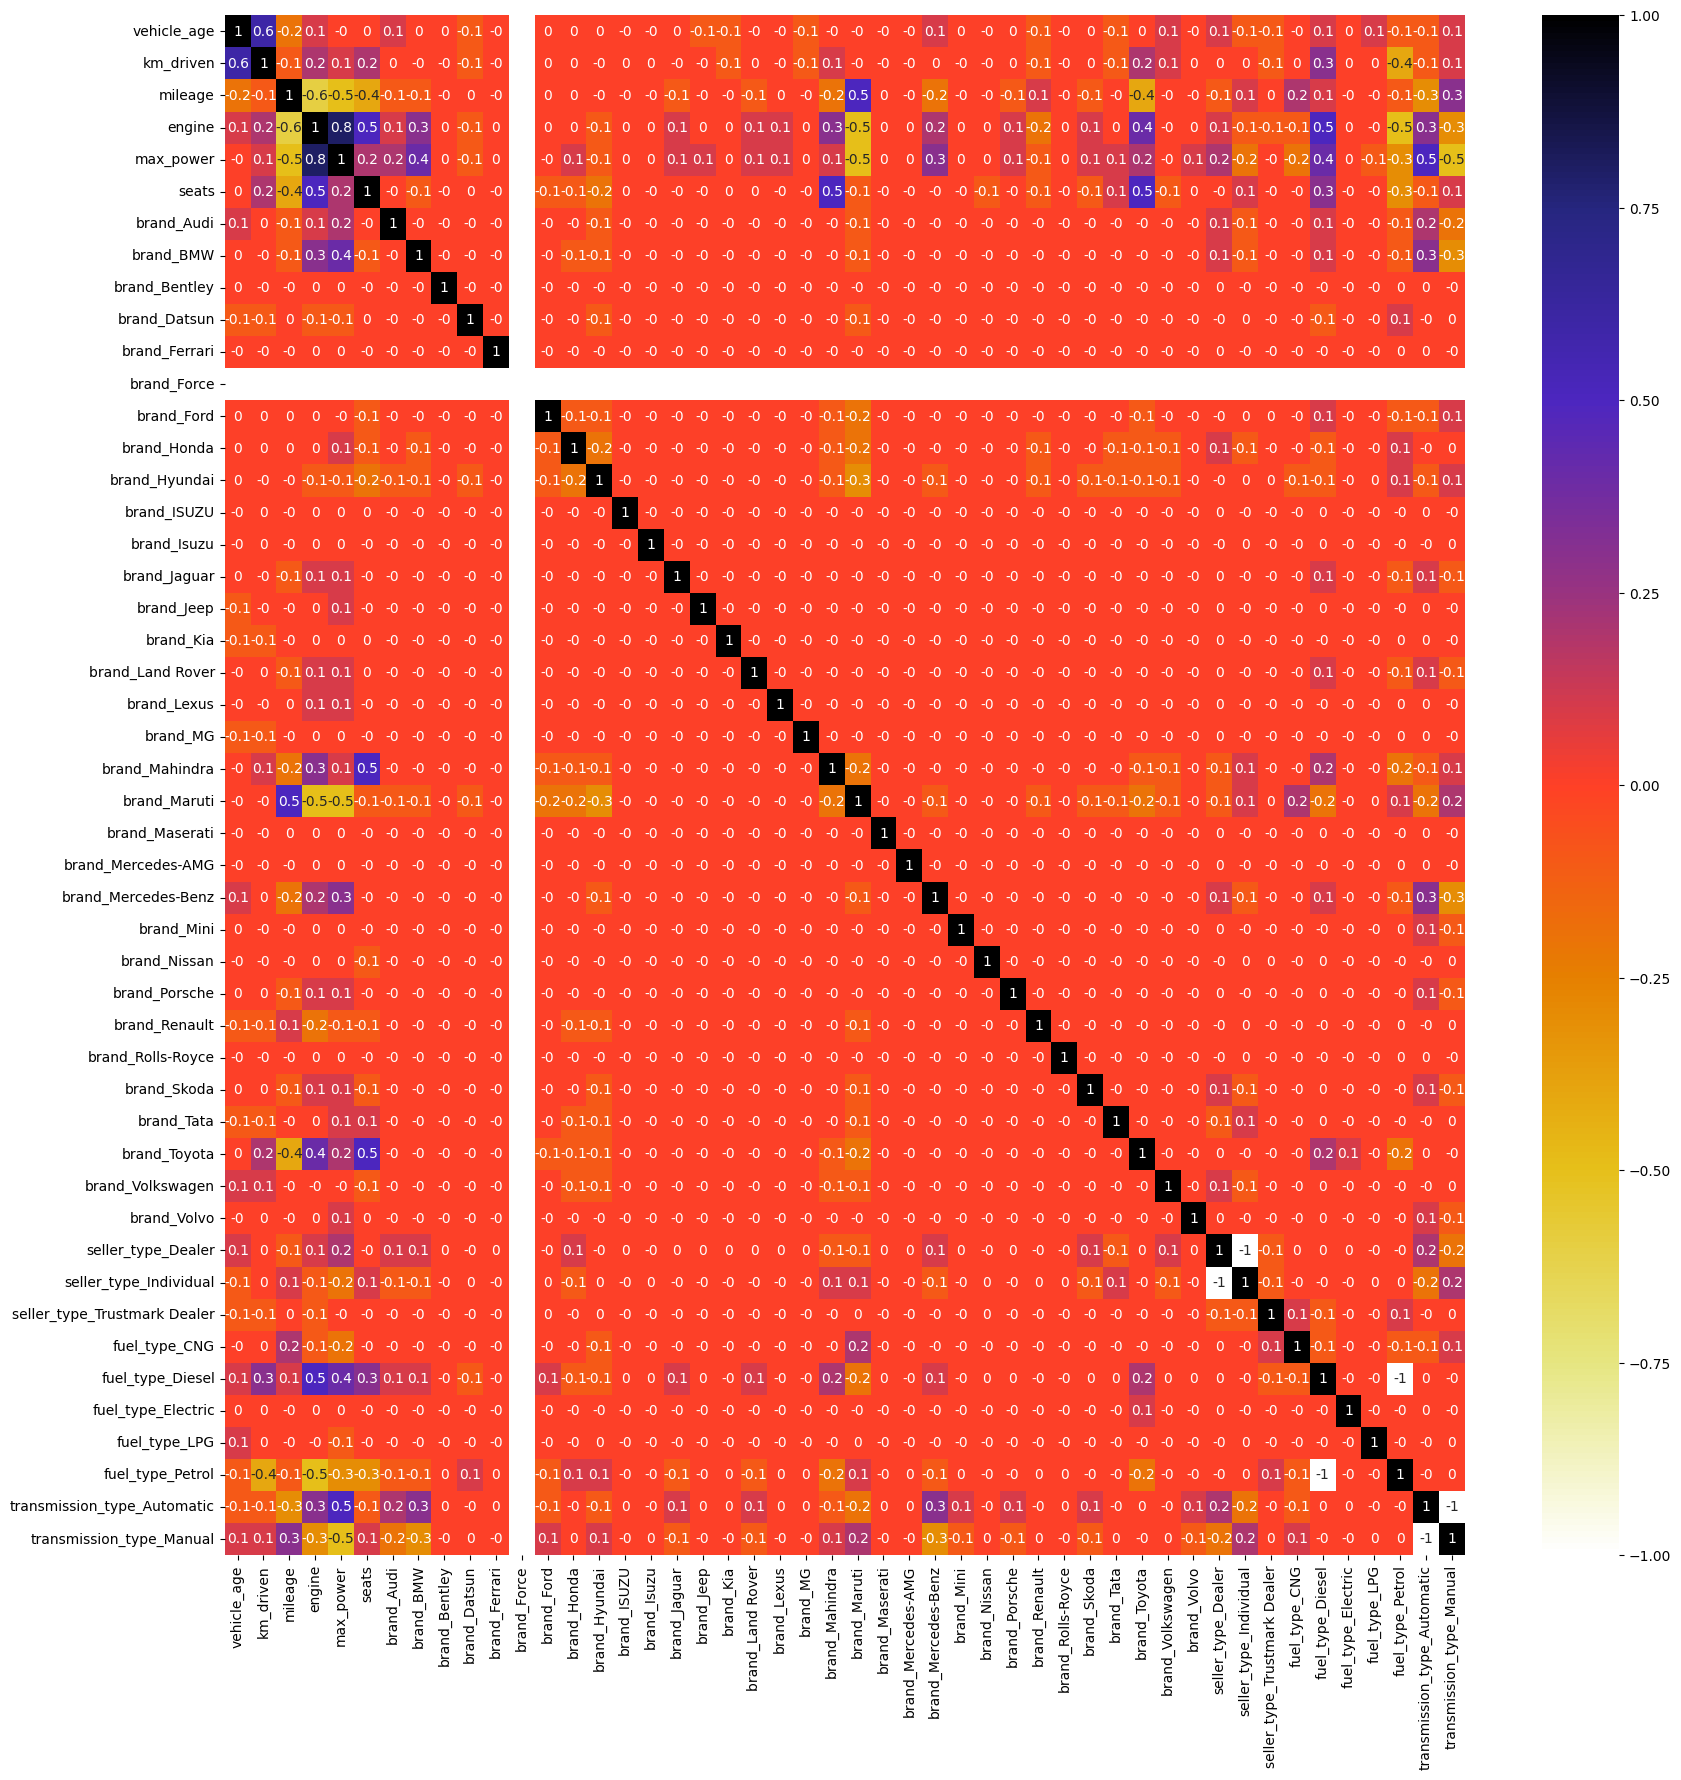

In [43]:
corr_matrix = round(corr_matrix,1)
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, cmap=plt.cm.CMRmap_r,annot=True)    # Heat map using saborn
plt.show()

#### 4.7 Provide detailed observations and conclusions.

**Independent features with highest correlation greater than 0.4 to target variable is(Highest to lowest)**
*   max_power
*   engine
*   transmission_type
*   vehicle_age

These features will therefore have the greatest effect onthe target variabele.



### Section 5: Feature Selection

#### 5.1 Use correlation result for feature selection.

In [44]:
def correlation(dataset, threshold):             # To find the correlated features using this method.
    corr_pairs = tuple()
    all_pairs = []
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                print(abs(corr_matrix.iloc[i, j]))
                corr_pairs = (corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j])
                all_pairs.append(corr_pairs)
    return all_pairs

In [45]:
corr_feature_pairs = correlation(X_train, 0.7)  # B) To find which independent features have maximum correlation calling the above correlation function
corr_feature_pairs

0.8384442285731014
0.9757376526004672
0.9558821985101927
1.0000000000000007


[('max_power', 'engine', np.float64(0.8384442285731014)),
 ('seller_type_Individual',
  'seller_type_Dealer',
  np.float64(-0.9757376526004672)),
 ('fuel_type_Petrol', 'fuel_type_Diesel', np.float64(-0.9558821985101927)),
 ('transmission_type_Manual',
  'transmission_type_Automatic',
  np.float64(-1.0000000000000007))]

#### 5.2 Select the features according to the K highest score.

In [46]:
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_regression
from sklearn.feature_selection import mutual_info_regression

In [47]:
sel_cols = SelectKBest(f_regression, k=10)  # Creating instance of SelectKBest class

sel_cols.fit(X_train, y_train)   # Applies feature selection tool (above) to training data.

SelectKBest(score_func=<function f_regression at 0x7b38782cd260>)

In [48]:
sel_cols = SelectPercentile(f_regression, percentile=20)   # Class selectkbest used to select top scoring features based on percentile (keeps only 20% of featureswith highest scores)

sel_cols.fit(X_train, y_train)                             # Fit() used to train feature seldctor on the training data.

SelectPercentile(percentile=20,
                 score_func=<function f_regression at 0x7b38782cd260>)

In [49]:
print(X_train.columns[sel_cols.get_support()])   # Actual selected important features with highest K score.

sel_cols.get_support()      # Boolean values of X_train columns - True when important feature, and false not not selected feature.

Index(['vehicle_age', 'mileage', 'engine', 'max_power', 'brand_BMW',
       'brand_Maruti', 'fuel_type_Diesel', 'fuel_type_Petrol',
       'transmission_type_Automatic', 'transmission_type_Manual'],
      dtype='object')


array([ True, False,  True,  True,  True, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
        True,  True,  True])

#### 5.3 Provide detailed insights about the selected features.




*   Correlation matrix showed that the following features had the greatest correlation with the target variable:
1.   max_power
2.   engine
3. transmission_type
4. vehicle_age

These would have h=the greatest impact on selling price compared to other features.

   

*   Correlation for correlation amongst independent variables showed that h=the following features had high correlation wish each other:


1.   max_power
2.   engine

These features correlate highly with each other and one should be dropped for a model to remove redundancy.



*   Features with highest K score basedon f_regression are:


1.   mileage
2.   max_power

These features were chosen based on there K score meaning they have a strong linear relationship with target variable.















**RANDOM FOREST REGRESSOR**

In [50]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, r2_score, mean_absolute_error, root_mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV

In [51]:
model = RandomForestRegressor(n_estimators=150, max_depth=10, min_samples_split=2, min_samples_leaf=2, random_state=42)  # Initializing model with optimized hyperparameter so as to have a accurate model which also needs to be a small size so that i can upload pickle file in github.

In [52]:
model.fit(X_train, y_train)     # fitting training data with model in order for model to learn patterns

RandomForestRegressor(max_depth=10, min_samples_leaf=2, n_estimators=150,
                      random_state=42)

In [53]:
y_pred = model.predict(X_test)
y_pred                            # Getting predicted values on the y_test (unseen) data in order to see if model generalized well

array([2.42553381, 2.43812752, 2.43813558, ..., 2.41475593, 2.48808882,
       2.43536873])

In [54]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [55]:
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")       # CAlculating the MAE between the actual and predicted values, the smaller the more accurate the model is.

Mean Absolute Error (MAE): 0.007668787310395203


In [56]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")      # Calculating the RMSE between the actual and predicted values, the smaller the more accurate the model is.

Root Mean Squared Error (RMSE): 0.009961515624521224


In [57]:
r_squared = r2_score(y_test, y_pred)
print(f"R-squared: {r_squared}")      # Calculating the R squared between the actual and predicted values, the closer to 1, the more accurate the model is.

R-squared: 0.9317786067155917


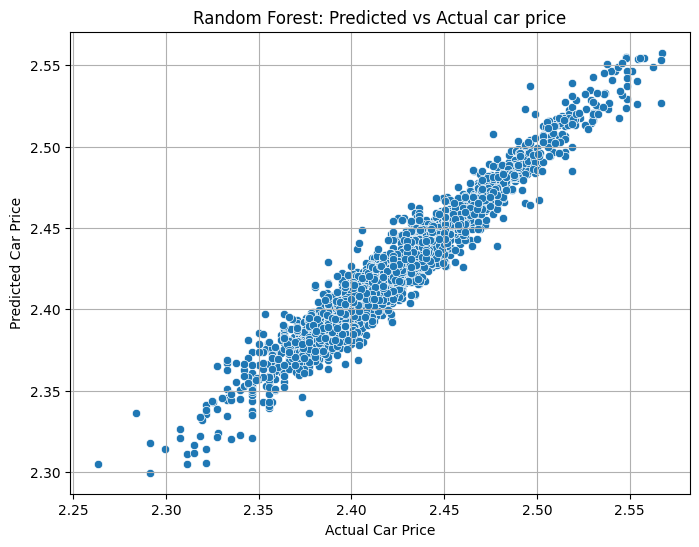

In [58]:
plt.figure(figsize=(8, 6))                  # Scatterplot showing the predicted and actual values
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Car Price")
plt.ylabel("Predicted Car Price")
plt.title("Random Forest: Predicted vs Actual car price")
plt.grid(True)
plt.show()

**LINEAR REGRESSION**

In [59]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [60]:
ridge = Ridge(alpha=2)                 # Initializing the Ridge regression model
ridge.fit(X_train, y_train)           # fitting training data with model in order for model to learn patterns

Ridge(alpha=2)

In [61]:
y_pred1=ridge.predict(X_test)       # Getting predicted values on the y_test (unseen) data in order to see if model generalized well

In [62]:
mae = mean_absolute_error(y_test, y_pred1)
print(f"Mean Absolute Error (MAE): {mae}")   # CAlculating the MAE between the actual and predicted values, the smaller the more accurate the model is.

Mean Absolute Error (MAE): 0.010304257363566258


In [63]:
mse = mean_squared_error(y_test, y_pred1)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")         # Calculating the RMSE between the actual and predicted values, the smaller the more accurate the model is.

Root Mean Squared Error (RMSE): 0.013422557719451812


In [64]:
r_squared = r2_score(y_test, y_pred1)
print(f"R-squared: {r_squared}")   # Calculating the R squared between the actual and predicted values, the closer to 1, the more accurate the model is.

R-squared: 0.8761373680246305


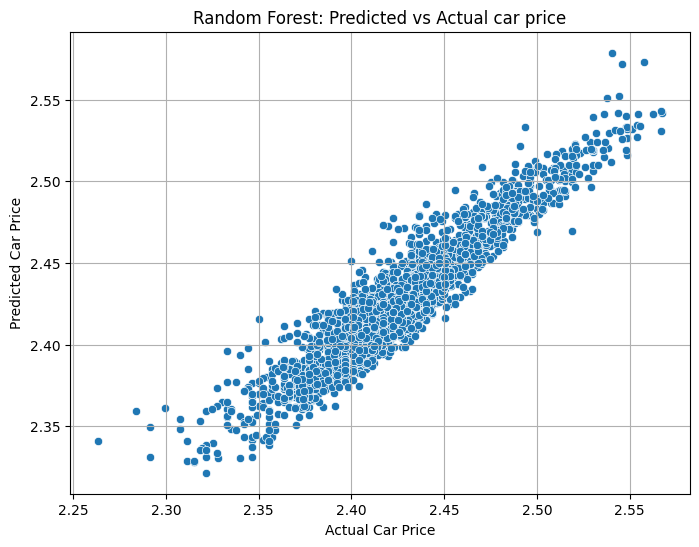

In [65]:
plt.figure(figsize=(8, 6))                     # Scatterplot showing the predicted and actual values
sns.scatterplot(x=y_test, y=y_pred1)
plt.xlabel("Actual Car Price")
plt.ylabel("Predicted Car Price")
plt.title("Random Forest: Predicted vs Actual car price")
plt.grid(True)
plt.show()

**SUPPORT VETOR MACHINE**

In [66]:
from sklearn.svm import SVR

In [67]:
svr = SVR(kernel='rbf', C=100, epsilon=0.005)    # Initializing the SV regression model
svr.fit(X_train, y_train)                          # fitting training data with model in order for model to learn patterns

SVR(C=100, epsilon=0.005)

In [68]:
y_pred2=svr.predict(X_test)    # Getting predicted values on the y_test (unseen) data in order to see if model generalized well

In [69]:
mae = mean_absolute_error(y_test, y_pred2)
print(f"Mean Absolute Error (MAE): {mae}")       # CAlculating the MAE between the actual and predicted values, the smaller the more accurate the model is.

Mean Absolute Error (MAE): 0.007541248326668847


In [70]:
mse = mean_squared_error(y_test, y_pred2)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")    # Calculating the RMSE between the actual and predicted values, the smaller the more accurate the model is.

Root Mean Squared Error (RMSE): 0.009973980828743822


In [71]:
r_squared = r2_score(y_test, y_pred2)
print(f"R-squared: {r_squared}")             # Calculating the R squared between the actual and predicted values, the closer to 1, the more accurate the model is.

R-squared: 0.931607764105727


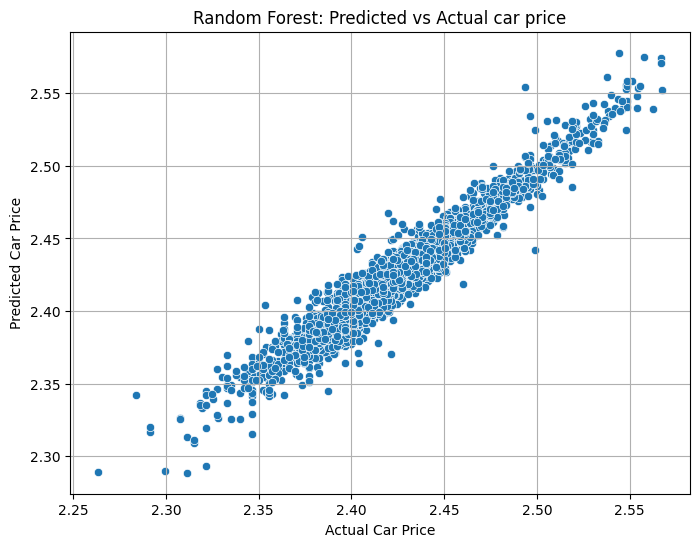

In [72]:
plt.figure(figsize=(8, 6))                    # Scatterplot showing the predicted and actual values
sns.scatterplot(x=y_test, y=y_pred2)
plt.xlabel("Actual Car Price")
plt.ylabel("Predicted Car Price")
plt.title("Random Forest: Predicted vs Actual car price")
plt.grid(True)
plt.show()

In [73]:
import pickle
with open('RFR.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)